# cosmic rejection which is external to our analysis

In [1]:
import sys; sys.path.insert(0, '../'); sys.path.insert(0, '../analysis_notes/mupClassification/'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
import seaborn as sns;sns.set(style="white", color_codes=True ,font_scale=2);
%matplotlib inline
from IPython.core.display import HTML,display
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/RejectingCosBGInLArTPC/Figures/CosmicRecoEffiency/'

In [3]:
summary = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/pandora_pairs/cosmic_pair_efficiency/prodcosmics_corsika_cmc_uboone_mcc8.7_reco_summary.csv' ) 
truth_pairs = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/pandora_pairs/cosmic_pair_efficiency/prodcosmics_corsika_cmc_uboone_mcc8.7_reco_truth_trajectories_pairs.csv' ) 
pandora_pairs = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/pandora_pairs/cosmic_pair_efficiency/prodcosmics_corsika_cmc_uboone_mcc8.7_reco_pandora_vertices.csv' ) 
pandoraCosmic_pairs = pandora_pairs[pandora_pairs['isPandoraCosmic']==True]
pandoraNu_pairs = pandora_pairs[pandora_pairs['isPandoraNu']==True]
summary

,time,Nevents,NPandoraNuTracks,NPandoraCosmicTracks,Nvertices,Nhits,NMCParticles,Ntruth_pairs,Ntruth_pairs_reconstructable,Ntruth_pairs_reconstructed,Ntruth_pairs_contained
0,Mon Mar 19 08:50:54 2018,10,63,501,4,41179,677,796,132,1,0


# reconstruction efficiency for cosmic particles pairs

In [4]:
pairs = dict()

pairs['reconstructable'] = truth_pairs[truth_pairs['IsVertexReconstructable']==True]
pairs['muons'] = pairs['reconstructable'][(np.abs(pairs['reconstructable']['pdg_1'])==13) | (np.abs(pairs['reconstructable']['pdg_2'])==13)]
pairs['no muons'] = pairs['reconstructable'][(np.abs(pairs['reconstructable']['pdg_1'])!=13) & (np.abs(pairs['reconstructable']['pdg_2'])!=13)]

pairs['muons no Michel'] = pairs['muons'][((pairs['muons']['pdg_1']*pairs['muons']['pdg_2'])!=(11*13))
                                                      |
                                                      ((pairs['muons']['MCParticle_1_process']!='muMinusCaptureAtRest')                                                 
                                                       &(pairs['muons']['MCParticle_2_process']!='muMinusCaptureAtRest'))
                                                      |(pairs['muons']['MCParticle_1_endx']!=pairs['muons']['MCParticle_2_startx'])]

pairs['Michel'] = pairs['muons'][((((pairs['muons']['pdg_1']*pairs['muons']['pdg_2'])==(11*13))                        
                                               &((pairs['muons']['MCParticle_1_process']=='muMinusCaptureAtRest')                  
                                                 |(pairs['muons']['MCParticle_2_process']=='muMinusCaptureAtRest'))
                                               &(pairs['muons']['MCParticle_1_endx']==pairs['muons']['MCParticle_2_startx']))==True)]


pairs['protons'] = pairs['reconstructable'][np.abs(pairs['reconstructable']['pdg_1']==2212) | (np.abs(pairs['reconstructable']['pdg_2'])==2212)]



reco = dict()
for key in pairs.keys():
    reco[key] = pairs[key][pairs[key]['IsVertexReconstructed']==True]
    print len(pairs[key]),'pairs labeled',key,' (', len(reco[key]),'reconstructed = (%.3f'%(100.*float(len(reco[key]))/len(pairs[key]))+'%))'
    print

46211 pairs labeled reconstructable  ( 122 reconstructed = (0.264%))

12231 pairs labeled no muons  ( 0 reconstructed = (0.000%))

893 pairs labeled protons  ( 0 reconstructed = (0.000%))

32861 pairs labeled muons no Michel  ( 108 reconstructed = (0.329%))

33980 pairs labeled muons  ( 122 reconstructed = (0.359%))

1119 pairs labeled Michel  ( 14 reconstructed = (1.251%))



In [106]:
print len(pairs['no muons']),'pairs labeled','no muons'

12231 pairs labeled no muons


number of pairs in at least one of the partners being a $\mu$: 60442
len(intersect): 2236
len(no_intersect): 58206

number of pairs in reconstructed as a fake vertex: 30
len(intersect): 29
len(no_intersect): 1

number of pairs in not a Michel-decay pair: 60169
len(intersect): 1963
len(no_intersect): 58206

number of pairs in reconstructed as a fake vertex: 25
len(intersect): 24
len(no_intersect): 1

number of pairs in Michel-decay pairs: 273
len(intersect): 273
len(no_intersect): 0

number of pairs in Michel pair reconstructed as a fake vertex: 5
len(intersect): 5
len(no_intersect): 0



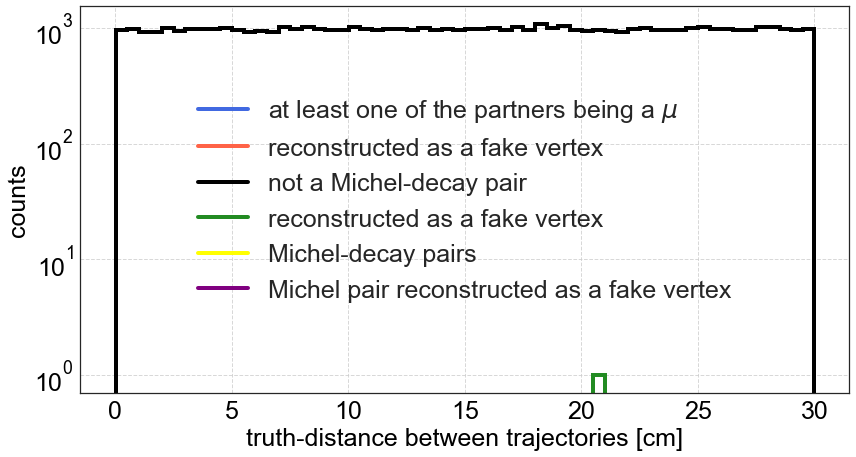

In [102]:
fig=plt.figure(figsize=(12,12))
h = dict()


Nevents=summary.Nevents
ax=fig.add_subplot(2,1,1)
# for tpairs,plabel,pcolor in zip([ pairs['reconstructable'], pairs['no muons']  ]
#                                ,['pairs of trajectories at close proximity','no muon']
#                                ,['black','forestgreen']):
#     plt.hist(tpairs['distance'] ,bins=np.linspace(0,30,31)
#                  ,color=pcolor,histtype='step',linewidth=4)
#     print 'number of pairs in '+plabel+':',len(tpairs)
#     plt.plot([0,0],[0,0],color=pcolor,linewidth=4,label=plabel)
# set_axes(ax,'' , 'counts'
#          ,do_add_grid=True,do_add_legend=True,legend_loc='lower center'
#          ,title='in %d open-cosmic events, %.2f M close trajectory-pairs'%(Nevents,len(pairs['reconstructable'])*1.e-6))
# # ax.set_yscale('log')
# ax.get_xaxis().set_major_formatter(NullFormatter())



# ax=fig.add_subplot(2,1,2)
for tpairs,plabel,pcolor in zip([ pairs['muons'] ,  reco['muons'],pairs['muons no Michel'] ,  reco['muons no Michel'], pairs['Michel'] ,  reco['Michel']  ]
                               ,[r'at least one of the partners being a $\mu$',r'reconstructed as a fake vertex'
                                 ,'not a Michel-decay pair','reconstructed as a fake vertex'
                                 ,'Michel-decay pairs','Michel pair reconstructed as a fake vertex']
                               ,['royalblue','tomato','black','forestgreen','yellow','purple']):
    intersect = tpairs[tpairs['distance']<0.1]
    no_intersect = tpairs[tpairs['distance']>0.1]
    print 'number of pairs in '+plabel+':',len(tpairs)
    print 'len(intersect):',len(intersect)
    print 'len(no_intersect):',len(no_intersect)
    print 
    plt.hist(tpairs['distance'] ,bins=np.linspace(0.01,30,61)
                 ,color=pcolor,histtype='step',linewidth=4)
    plt.plot([0,0],[0,0],color=pcolor,linewidth=4,label=plabel)
set_axes(ax,'truth-distance between trajectories [cm]' , 'counts'
         ,do_add_grid=True,do_add_legend=True,legend_loc='center'
#          ,yticks=[1,10,100,1000]
#          ,ylim=(1,1100)
#          ,title=(r"%.1f"%(100.*float(len(reconstructed))/len(pairs_with_muons))
#          +r"$\%$ of pairs reconstructed as a fake vertex, "
#          +r"%.1f"%(100.*float(len(reconstructed))/len(michels)))+r"$\%$ of Michels"
        )
ax.set_yscale('log')


plt.tight_layout()
plt.savefig(figures_path+'reconstruction_efficiency_truth_trajectory_pairs.pdf')

(array([  15458.,       0.,       0.,  196455.,       0.,       0.,
          16091.,       0.,       0.,   67117.]),
 array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ]),
 <a list of 10 Patch objects>)

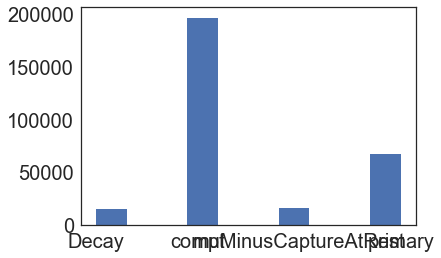

In [65]:
plt.hist(pairs['reconstructable']['MCParticle_1_process'])

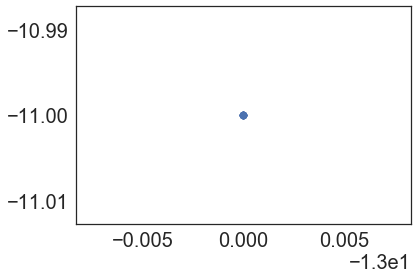

In [84]:
# plot_2d_hist(pairs['position_z'],pairs['position_y']);
# plt.scatter(pairs['pdg_1'],pairs['pdg_2'],bins=(np.linspace(10,15,100),np.linspace(10,15,100)));
# plt.scatter(pairs['MCParticle_1_length'],pairs['MCParticle_2_length']);
# plt.scatter(pairs['MCParticle_1_mother'],pairs['MCParticle_2_mother']);
# same_mother = pairs[(pairs['MCParticle_1_mother']==pairs['MCParticle_2_mother'])|(pairs['MCParticle_1_mother']==pairs['MCParticle_2'])|(pairs['MCParticle_2_mother']==pairs['MCParticle_1'])]
# print 'len(michels):',len(michels)
# plt.scatter(same_mother['MCParticle_1_mother'],same_mother['MCParticle_2_mother']);
# plt.scatter(pairs['MCParticle_1_process'],pairs['MCParticle_2_process']);
# plt.scatter(pairs['MCParticle_1_mother'],pairs['MCParticle_2']);
# plt.scatter(pairs['MCParticle_2_mother'],pairs['MCParticle_1']);
# plt.scatter(micheles['MCParticle_1_length'],micheles['pdg_1'])
# plt.scatter(pairs['MCParticle_1_length'],pairs['MCParticle_2_length'])
# plt.scatter(michels['MCParticle_1_length'],michels['MCParticle_2_length'])
plt.figure()
# plt.scatter(michels['MCParticle_1_starty'],michels['MCParticle_2_starty'])
# plt.scatter(michels['pdg_1'],michels['pdg_2'])
# plt.scatter(michels['MCParticle_1_endx'],michels['MCParticle_2_startx'])
# plt.scatter(michels['MCParticle_1_endy'],michels['MCParticle_2_starty'])
# plt.scatter(michels['MCParticle_1_endz'],michels['MCParticle_2_startz'])
# plt.scatter(pairs['no muons']['pdg_1'],pairs['no muons']['pdg_2'])
plt.scatter(reco['no muons']['pdg_1'],reco['no muons']['pdg_2'])


# plot_2d_hist(same_mother['MCParticle_1_length'],same_mother['pdg_1'],bins=(np.linspace(1500,2500,100),np.linspace(10,15,100)));

In [10]:
summary = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/pandora_pairs/tmp_cosmic_pair_efficiency/prodcosmics_corsika_cmc_uboone_mcc8.7_reco_summary.csv' ) 
truth_pairs = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/pandora_pairs/tmp_cosmic_pair_efficiency/prodcosmics_corsika_cmc_uboone_mcc8.7_reco_truth_trajectories_pairs.csv' ) 
pandora_pairs = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/pandora_pairs/tmp_cosmic_pair_efficiency/prodcosmics_corsika_cmc_uboone_mcc8.7_reco_pandora_vertices.csv' ) 
pandoraCosmic_pairs = pandora_pairs[pandora_pairs['isPandoraCosmic']==True]
pandoraNu_pairs = pandora_pairs[pandora_pairs['isPandoraNu']==True]
summary

/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,time,Nevents,NPandoraNuTracks,NPandoraCosmicTracks,Nvertices,Nhits,NMCParticles,Ntruth_pairs,Ntruth_pairs_reconstructable,Ntruth_pairs_reconstructed,Ntruth_pairs_contained
0,Wed Mar 21 05:29:05 2018,3000,19134,142063,1546,13144480,195264,227258,28608,134,0


number of pairs in pandoraNu-pairs: 1337
number of pairs in broken trajectories as pandoraNu-pairs: 1002


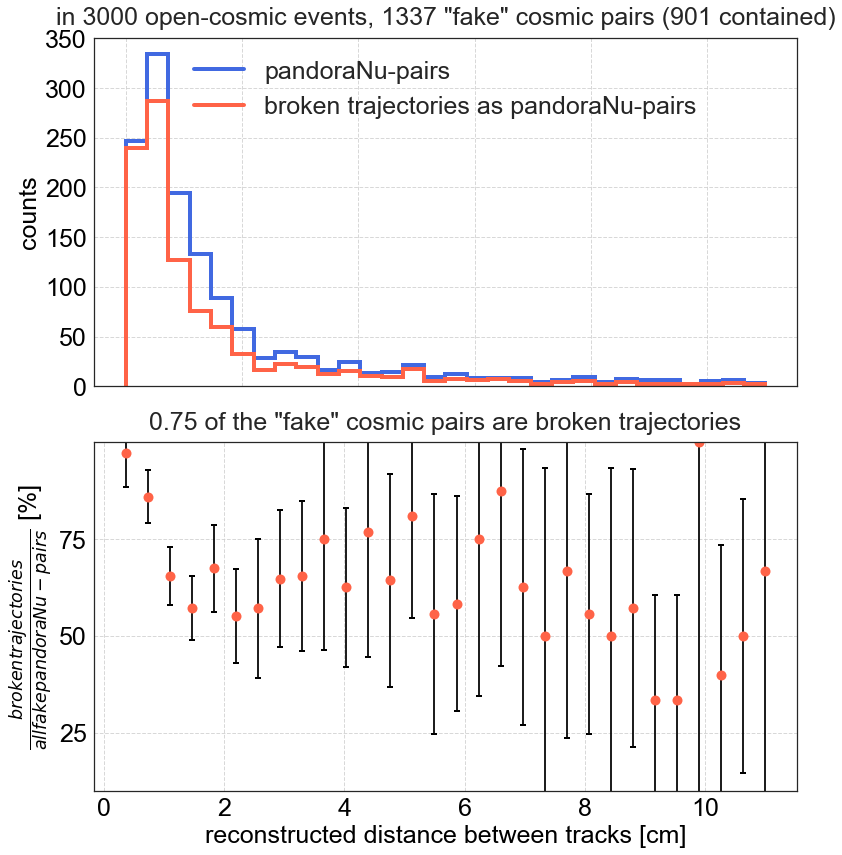

In [11]:
Nevents = summary.Nevents
fig=plt.figure(figsize=(12,12))
h = dict()
ax = fig.add_subplot(2,1,1)
bins=np.linspace(0,11,31)
Nevents=3000
pandoraNu_pairs = pandoraNu_pairs[pandoraNu_pairs['distance']<11]
pandoraNu_pairs_FV = sample_in_FV(sample=pandoraNu_pairs)
for pairs,plabel,pcolor in zip([pandoraNu_pairs, pandoraNu_pairs[pandoraNu_pairs['isBrokenTrajectory']==True]] #pandoraCosmic_pairs, pandoraCosmic_pairs[pandoraCosmic_pairs['isBrokenTrajectory']==True],
                               ,['pandoraNu-pairs','broken trajectories as pandoraNu-pairs'] # 'pandoraCosmic-pairs','broken trajectories as pandoraCosmic pair',
                               ,['royalblue','tomato','black','forestgreen']):
    h[plabel],_,_ = plt.hist(pairs['distance'] ,bins=bins
                 ,color=pcolor,histtype='step',linewidth=4)
    print 'number of pairs in '+plabel+':',len(pairs)
    plt.plot([0,0],[0,0],color=pcolor,linewidth=4,label=plabel)
set_axes(ax,'' , 'counts',title='in %d open-cosmic events, %d "fake" cosmic pairs (%d contained)'%(Nevents,len(pandoraNu_pairs),len(pandoraNu_pairs_FV))
         ,do_add_grid=True,do_add_legend=True,legend_loc='upper center')
ax.get_xaxis().set_major_formatter(NullFormatter())

ax = fig.add_subplot(2,1,2)
h_ratio = h['broken trajectories as pandoraNu-pairs']/h['pandoraNu-pairs']
h_ratio_err = h_ratio*np.sqrt(1./h['broken trajectories as pandoraNu-pairs']+1./h['pandoraNu-pairs'])
mid = 0.5*(bins[1:]+bins[:-1]) + 0.5*(bins[1]-bins[0])
plt.errorbar(x=mid,y=100*h_ratio,yerr=100*h_ratio_err,fmt='o' ,markersize=10,color='tomato',ecolor='black',capthick=2,capsize=3)
set_axes(ax,'reconstructed distance between tracks [cm]' , r'$\frac{broken trajectories}{all fake pandoraNu-pairs}$ [%]'
         ,title='%.2f of the "fake" cosmic pairs are broken trajectories'%(float(len(pandoraNu_pairs[pandoraNu_pairs['isBrokenTrajectory']==True]))/len(pandoraNu_pairs))
                                                                           ,do_add_grid=True,do_add_legend=True,legend_loc='upper center',ylim=(10,100),yticks=[25,50,75])


plt.tight_layout()
plt.savefig(figures_path+'broken_cosmic_trajectories.pdf')

In [24]:
nonbroken = pandoraNu_pairs[pandoraNu_pairs['isBrokenTrajectory']==False]
nonbroken[['run','subrun','event','vertex_id']]

,run,subrun,event,vertex_id
6,1,1080,107902,0
66,1,1080,107914,1
93,1,1080,107921,1
116,1,1080,107926,0
117,1,1080,107926,1
124,1,1080,107927,0
125,1,1080,107927,1
165,1,1080,107934,2
183,1,1080,107936,0
212,1,1080,107941,4
